In [196]:
"""
Descrição do Problema: Otimização de suas funçções multimodais com restrições usando os algoritmos
PSO e GA.
"""

'\nDescrição do Problema: Otimização de suas funçções multimodais usando os algoritmos\nPSO e GA.\n'

## Função 01: g01

In [197]:
import numpy as np

################
## função G01 ##
################
def g01(x: np.array):
    sum1 = 0
    for i in range(4):
        sum1 += x[i]**2

    sum2 = 0
    for i in range(13):
        sum2 += x[i]

    return 5*x[0] + 5*x[1] + 5*x[2] + 5*x[3] - 5*sum1 - sum2

# restrições da função g01
constraint_eq = [
    lambda x: 2*x[0] + 2*x[1] + x[9] + x[10] - 10,
    lambda x: 2*x[0] + 2*x[2] + x[9] + x[11] - 10,
    lambda x: 2*x[1] + 2*x[2] + x[10] + x[11] - 10,
    lambda x: -8*x[0] + x[9],
    lambda x: -8*x[1] + x[10],
    lambda x: -8*x[2] + x[11],
    lambda x: -2*x[3] - x[4] + x[9],
    lambda x: -2*x[5] - x[6] + x[10],
    lambda x: -2*x[7] - x[8] + x[11]
]

# limites inferiores e superiores para cada variável
lower_bounds = [0.0]*13
upper_bounds = [1.0]*9 + [100.0] * 3 + [1.0]

### Otimização da g01 com GA

In [198]:
from sko.GA import GA

ga = GA(g01, n_dim=13, size_pop=50, max_iter=100, lb=lower_bounds, ub=upper_bounds, constraint_eq=constraint_eq)
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Best Error: {best_y_ga}')

best_x: [0.45058098 0.22339405 0.74913667 0.99208838 0.98490745 0.65167079
 0.50627276 0.73208754 0.94238323 3.60335792 1.80871654 5.90345814
 0.93618631]
 GA Best Error: [-15.40010647]


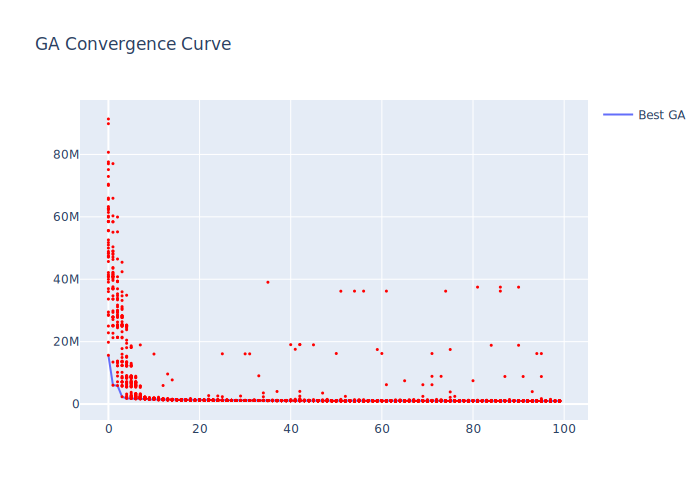

In [199]:
import plotly.graph_objects as go
history_ga_best = [y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='GA Convergence Curve')
fig.show('svg')

### Otimização da g01 com PSO

In [200]:
from sko.PSO import PSO

pso = PSO(g01, n_dim=13, pop=100, max_iter=1000, lb=lower_bounds, ub=upper_bounds, constraint_ueq=constraint_eq, w=0.9, c1=1.2, c2=1.5)
pso.run()
print(f'best_x: {pso.gbest_x}\n PSO Training Accuracy: {pso.gbest_y}')

best_x: [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 1.]
 PSO Training Accuracy: [-15.]


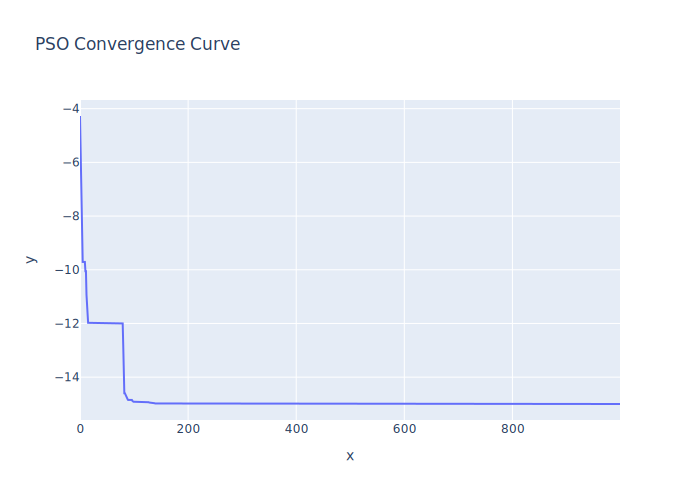

In [201]:
import plotly.express as px

pso_best_hist = [y[0] for y in pso.gbest_y_hist]

fig = px.line(x=list(range(len(pso_best_hist))), y=pso_best_hist, title='PSO Convergence Curve')
fig.show('svg')

## Função 02: g02

In [202]:
################
## função G02 ##
################
def g02(x: np.array):
    return (x[0] -10)** 2 + 5*(x[1] -12)**2 + x[2]**4 + 3*(x[3] - 11)**2 + 10*x[4]**6 + 7*x[5]**2 + x[6]**4 - 4*x[5]*x[6] - 10*x[5] - 8*x[6]

# restrições da função g02
constraint_eq = [
    lambda x: 127 - 2*x[0]**2 - 3*x[1]**4 - x[2] - 4*x[3]**2 - 5*x[4],
    lambda x: 282 - 7*x[0] - 3*x[1] - 10*x[2]**2 - x[3] + x[4],
    lambda x: 196 - 23*x[0] - x[1]**2 - 6*x[5]**2 + 8*x[6],
    lambda x: -4*x[0]**2 +  x[1]**2 + 3*x[0]*x[1] - 2*x[2]**2 - 5*x[5] + 11*x[6]
]

### Otimização da g02 com GA

In [203]:
ga = GA(g02, n_dim=7, size_pop=50, max_iter=100, lb=[-10]*7, ub=[10]*7, constraint_eq=constraint_eq)
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Best Error: {best_y_ga}')

best_x: [-4.33019405  0.08023199 -5.59921628  4.10088991  5.51372258 -7.83078781
  9.05394375]
 GA Best Error: [290456.05027267]


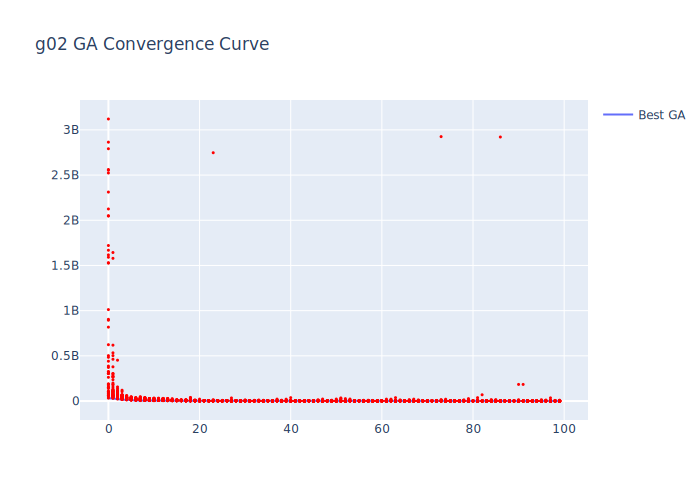

In [204]:
import plotly.graph_objects as go
history_ga_best = [y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='g02 GA Convergence Curve')
fig.show('svg')

### Otimização da g02 com pso

In [205]:
from sko.PSO import PSO

pso = PSO(g02, n_dim=7, pop=100, max_iter=1000, lb=[-10]*7, ub=[10]*7, constraint_ueq=constraint_eq, w=0.9, c1=1.2, c2=1.5)
pso.run()
print(f'best_x: {pso.gbest_x}\n PSO Training Accuracy: {pso.gbest_y}')

best_x: [10.         10.         -4.14048855 10.         -0.56375322  1.13623474
  1.46189295]
 PSO Training Accuracy: [301.12842888]


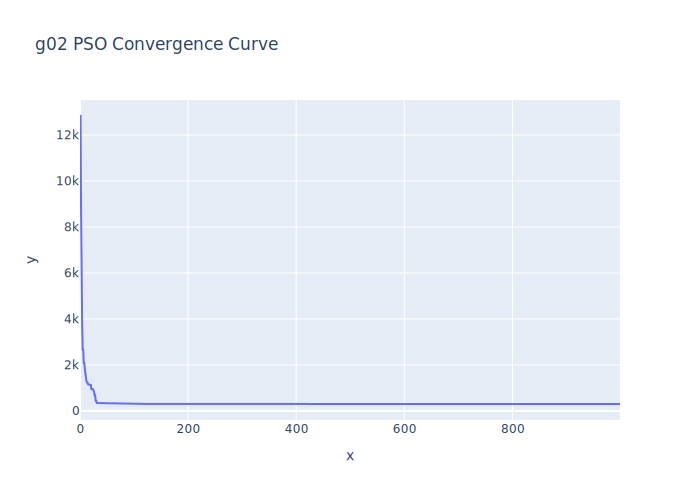

In [206]:
import plotly.express as px

pso_best_hist = [y[0] for y in pso.gbest_y_hist]

fig = px.line(x=list(range(len(pso_best_hist))), y=pso_best_hist, title='g02 PSO Convergence Curve')
fig.show('svg')